## Dose-Response Plotter

In [1]:
CC=0.1
percent_range = range(4,95)

We call the libraries and the data from the experiment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [3]:
def load_data(filedir):
    
    mydata = np.genfromtxt(filedir,delimiter="\t")
    TotalDensity = [i[0] for i in mydata] #Total bacterial density
    Suc = [i[1] for i in mydata] #Susceptible strain total density
    Res = [i[2] for i in mydata] #Resistant strain total density
    Rel_Freq = [i[2]/(i[1]+i[2]) for i in mydata] #Resistant Relative Frequency
    Suc_win = [i[3] for i in mydata] #Number of wins of Susceptible strain
    Res_win = [i[4] for i in mydata] #Number of wins of Resistant strain
    R_S_winratio = [i[4]/(i[3]+i[4]) for i in mydata]#node-to-node Resistant WinRatio
    Netdensity = [i[6] for i in mydata] #Network density
    clustc = [i[7] for i in mydata] #Network clustering coefficient
    clo_centr = [i[8] for i in mydata] #Closeness centrality
    ant_deg = [i[9] for i in mydata] #Antibiotic source connectivity
    bet_centr = [i[10] for i in mydata] #Betweeness centrality
    ant_con = [i[11] for i in mydata]
    ME = [i[12] for i in mydata]
    
    d = {'TotDen':TotalDensity,'SucDen':Suc,'ResDen':Res,'Rel_Freq':Rel_Freq,
           'SucWin':Suc_win, 'ResWin':Res_win, 'R_S_winratio':R_S_winratio,
           'NetDen':Netdensity,'ClustC':clustc,'CloCentr':clo_centr,'AntDeg':ant_deg,
           'BetCentr':bet_centr,'AntCon':ant_con,'ME':ME}
    return pd.DataFrame(d)

In [4]:
NamesDict = {'TotDen':'Total Bacterial Density','SucDen': 'Susceptible Bacteria Density',
             'ResDen': 'Resistant Bacteria Density','Rel_Freq': 'Resistant Relative Frequency',
       'SucWin': 'Susceptible Node Winners', 'ResWin':'Resistant Node Winners', 'R_S_winratio':'Ratio of winners R/S',
       'NetDen':'Network Density','ClustC':'Global Clustering Coefficient','CloCentr':'Closeness Centrality',
        'ant_deg':'Connectivity of Antibiotic Source',
       'BetCentr':'Betweenness Centrality','AntCon':'Antibiotic Concentration','ME':'ME'}

In [6]:
sim_MEs = [4,5,6,7,8,9,10]#no 0
sim_size = len(sim_MEs)
df_vec = [load_data("DR_N_50_meanedg_"+str(i)+"_watts_out") for i in sim_MEs]

We generate the function for plotting many comparisons

In [21]:
def plot_Dose_on_col(column):
    mean_matrix = [df_vec[i].groupby(['AntCon'],as_index=False).mean() for i in range(sim_size)]
    stderr_matrix = [df_vec[i].groupby(['AntCon'],as_index=False).std() for i in range(sim_size)]
    Ant_Con = mean_matrix[0].AntCon

    for i in range(sim_size):
        plt.plot(mean_matrix[i]['AntCon'], mean_matrix[i][column])
        plt.fill_between(mean_matrix[i]['AntCon'], mean_matrix[i][column]-stderr_matrix[i][column], mean_matrix[i][column]+stderr_matrix[i][column],alpha=0.5)
    plt.legend([str(i) for i in range(sim_size)],loc='best',title="Mean Edges")
    plt.xlabel("Antibiotic Concentration")
    plt.ylabel(NamesDict[column])
    plt.title("Response of "+ NamesDict[column]+" to increasing Ant Doses",y=1.08)
    
    plt.savefig("Figures/DR_"+NamesDict[column]+"_stdv.png")
    plt.show()

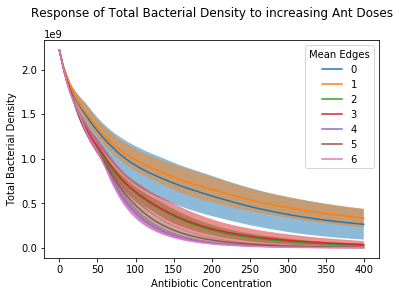

In [22]:
plot_Dose_on_col('TotDen')

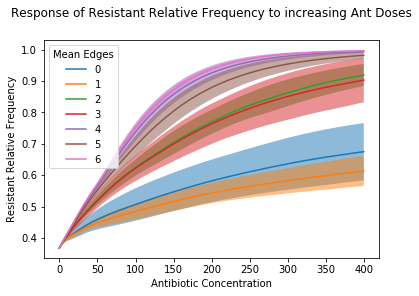

In [23]:
plot_Dose_on_col('Rel_Freq')

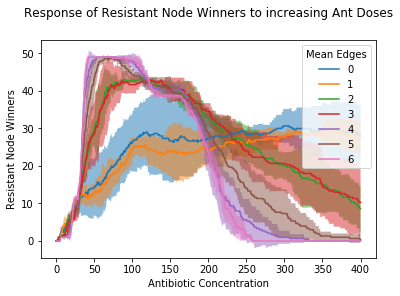

In [24]:
plot_Dose_on_col('ResWin')

## Analysis of Relative Frequency AND Density

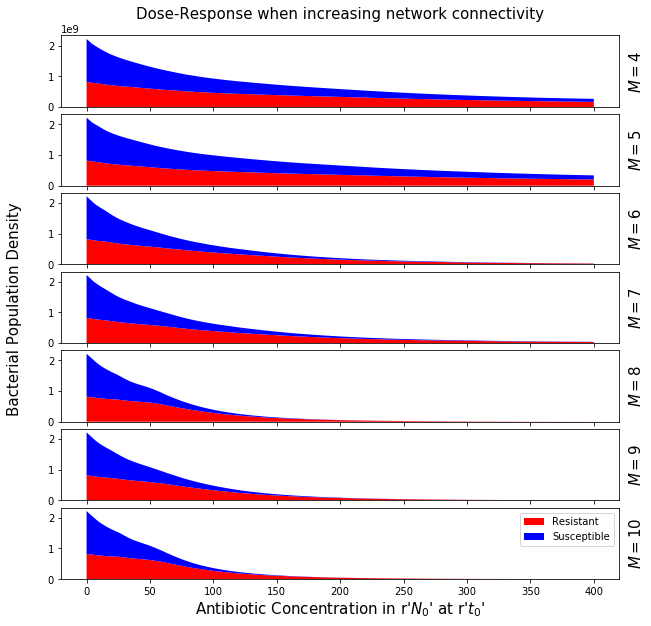

In [25]:
fontsize=15
f, ax_vec = plt.subplots(sim_size, sharex=True, sharey=False, figsize=(10,10))

mean_matrix = [df_vec[i].groupby(['AntCon'],as_index=False).mean() for i in range(sim_size)]

for i in range(sim_size):
    ax = ax_vec[i]
    ax.stackplot(mean_matrix[i]['AntCon'],mean_matrix[i].ResDen,mean_matrix[i].SucDen,colors=['red','blue'])


    ax.annotate(r'$M=%d$' % sim_MEs[i], xy=(1.03,0.5), rotation=90,
                        ha='center',va='center',xycoords='axes fraction', fontsize=fontsize)
    if i==0:
        ax.set_title('Dose-Response when increasing network connectivity',y=1.15,fontsize=fontsize)
    else:
        ax.yaxis.get_offset_text().set_visible(False)
        if i==sim_size-1:
            ax.legend(['Resistant','Susceptible'])

f.subplots_adjust(wspace=0,hspace=0.1)
plt.xlabel("Antibiotic Concentration in r'$N_0$' at r'$t_0$'",fontsize=fontsize)
f.text(0.05, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.savefig("Figures/DR_varME_BDen_CC"+str(CC)+"_Watts.png")
plt.show()

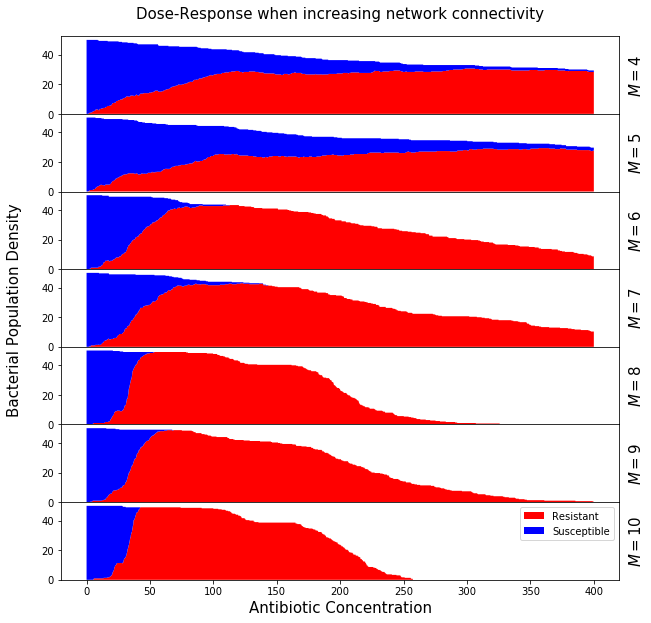

In [26]:
fontsize=15
f, ax_vec = plt.subplots(sim_size, sharex=True, sharey=False, figsize=(10,10))

mean_matrix = [df_vec[i].groupby(['AntCon'],as_index=False).mean() for i in range(sim_size)]
maxVal = np.max(np.sum(mean_matrix[i].ResWin,mean_matrix[i].SucWin) for i in range(sim_size))
#norm_mean_matrix = [[mean_matrix[i][j]/maxVal for i in range(sim_size)]for j in range(len(mean_matrix[i]))] 
for i in range(sim_size):
    ax = ax_vec[i]
    ax.stackplot(mean_matrix[i]['AntCon'],mean_matrix[i].ResWin,mean_matrix[i].SucWin,colors=['red','blue'])
    
    
    ax.annotate(r'$M=%d$' % sim_MEs[i], xy=(1.03,0.5), rotation=90,
                        ha='center',va='center',xycoords='axes fraction', fontsize=fontsize)
    if i==0:
        ax.set_title('Dose-Response when increasing network connectivity',y=1.15,fontsize=fontsize)
    else:
        ax.yaxis.get_offset_text().set_visible(False)
        if i==sim_size-1:
            ax.legend(['Resistant','Susceptible'])
    
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(wspace=0,hspace=0)
plt.xlabel("Antibiotic Concentration",fontsize=fontsize)
f.text(0.05, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.savefig("Figures/DR_varME_Dscore_CC"+str(CC)+"_Watts.png")
plt.show()

In [27]:
def get_IC(mean_matrix,column,percent_range):
    
    if column=='ResWin':
        maxVal = np.max([mean_matrix[i][column]+mean_matrix[i]['SucWin'] for i in range(sim_size)])
        for i in range(sim_size):
            if len(mean_matrix[i][(mean_matrix[i]['ResWin']+mean_matrix[i]['SucWin'] < maxVal*percentage/100)]) > 0: #### TODO After corrections use shorter version
                ICX_vec.append(mean_matrix[i][(mean_matrix[i]['ResWin']+mean_matrix[i]['SucWin'] < maxVal*percentage/100)].iloc[0].AntCon.round(1))
                IC_percent_vec.append(percentage)


    else:
        maxVal = np.max([mean_matrix[i][column] for i in range(sim_size)])
        for i in range(1,sim_size):
            if len(mean_matrix[i][(mean_matrix[i][column] < maxVal*percentage/100)]) > 0: #### TODO After corrections use shorter version
                ICX_vec.append(mean_matrix[i][(mean_matrix[i][column] < maxVal*percentage/100)].iloc[0].AntCon.round(1))
                IC_percent_vec.append(percentage)   

    return [IC_percent_vec,ICX_vec]

def get_ICs(mean_matrix,column,percent_range):
    IC_percent_vec = [[] for i in range(sim_size)]
    ICX_vec = [[] for i in range(sim_size)]
    
    for percentage in percent_range:
        if column=='ResWin':
            maxVal = np.max([mean_matrix[i][column]+mean_matrix[i]['SucWin'] for i in range(sim_size)])
            for i in range(1,sim_size):
                if len(mean_matrix[i][(mean_matrix[i]['ResWin']+mean_matrix[i]['SucWin'] < maxVal*(1-percentage/100))]) > 0: #### TODO After corrections use shorter version
                    ICX_vec[i].append(mean_matrix[i][(mean_matrix[i]['ResWin']+mean_matrix[i]['SucWin'] < maxVal*(1-percentage/100))].iloc[0].AntCon.round(1))
                    IC_percent_vec[i].append(percentage)
        
    
        else:
            maxVal = np.max([mean_matrix[i][column] for i in range(sim_size)])
            for i in range(1,sim_size):
                if len(mean_matrix[i][(mean_matrix[i][column] < maxVal*(1-percentage/100))]) > 0: #### TODO After corrections use shorter version
                    ICX_vec[i].append(mean_matrix[i][(mean_matrix[i][column] < maxVal*(1-percentage/100))].iloc[0].AntCon.round(1))
                    IC_percent_vec[i].append(percentage)   
                    
    return [IC_percent_vec,ICX_vec]

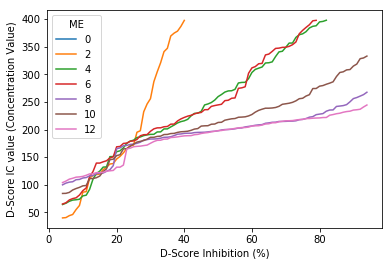

In [28]:
IC_percent,ICX_ant_vec = get_ICs(mean_matrix,'ResWin',percent_range) 

for i in range(sim_size):
    plt.plot(IC_percent[i],ICX_ant_vec[i])
plt.legend([str((i)*2) for i in range(sim_size)],title="ME")
plt.xlabel("D-Score Inhibition (%)")
plt.ylabel("D-Score IC value (Concentration Value)")
plt.show()

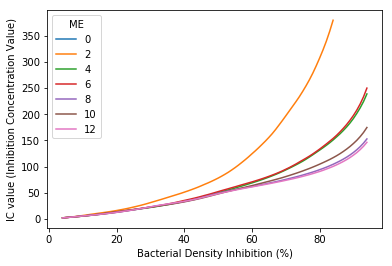

In [29]:
IC_percent,ICX_ant_vec = get_ICs(mean_matrix,'TotDen',percent_range) 

for i in range(sim_size):
    plt.plot(IC_percent[i],ICX_ant_vec[i])
plt.legend([str((i)*2) for i in range(sim_size)],title="ME")
plt.xlabel("Bacterial Density Inhibition (%)")
plt.ylabel("IC value (Inhibition Concentration Value)")

plt.savefig("Figures/IC_comparison_means_Watts.png")
plt.show()

In [ ]:
rep_num = 10 #Number of replicates in simulations
rep_len = 801 # Number of elements per simulation.

def get_ICs_wErrs(df_vec,column,percentage):
    IC_mat = [[] for i in range(sim_size)]
    IC_mean = []
    IC_error = []

    maxVal = np.max([df_vec[i][column] for i in range(sim_size)])
    for me in range(sim_size):
        for repl in range(rep_num):
            df_tmp = df_vec[me].loc[repl*rep_len:(repl+1)*rep_len-1]
            if len(df_tmp[(df_tmp[column] < maxVal*(1-percentage/100))]) > 0:
                IC_mat[me].append(df_tmp[(df_tmp[column] < maxVal*(1-percentage/100))].iloc[0].AntCon.round(1))
    
        IC_error.append(np.array(IC_mat[me]).std())
        IC_mean.append(np.array(IC_mat[me]).mean())

    return(IC_mean,IC_error)

In [ ]:
IC_and_Err = [get_ICs_wErrs(df_vec,'TotDen',i) for i in percent_range]
IC_ind_mean_vec = [[IC_and_Err[i][0][j] for i in range(len(IC_and_Err))] for j in range(sim_size)]
IC_ind_err_vec = [[IC_and_Err[i][1][j] for i in range(len(IC_and_Err))] for j in range(sim_size)]

In [ ]:
for i in range(sim_size):
            plt.plot(percent_range,IC_ind_mean_vec[i])
            plt.fill_between(percent_range,[IC_ind_mean_vec[i][j]-IC_ind_err_vec[i][j] for j in range(len(percent_range))],[IC_ind_mean_vec[i][j]+IC_ind_err_vec[i][j] for j in range(len(percent_range))],alpha=0.1)
plt.legend([sim_MEs[i] for i in range(sim_size)],loc='best',title="Mean Edges")
plt.xlabel("Bacterial Density Inhibition (%)")
plt.ylabel("IC value (Inhibition Concentration Value)")

plt.savefig("Figures/IC_comparison_ind_stdv.png")
plt.show()